In [1]:
# EDA
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pingouin import ttest

# ML
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, auc, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Oitmização de Hiperparametros
import optuna

/Users/brunobandeirafernandes/Documents/Github/Python/LogisticRegression_IA_Python/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Carregar os Dados 

In [2]:
# Carregar dados para o Dataframe
df_frutas = pd.read_csv('./datasets/fruit_quality.csv')

In [3]:
# Visualizar Dataframe 
df_frutas.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [13]:
# Visualizar Dataframe 
df_frutas.tail(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3990,3990,-1.396794,-0.599596,-1.931104,1.815668,1.670732,1.614027,-0.987968,0
3991,3991,-4.007762,2.970164,0.218167,-0.492369,1.656375,-2.133895,-4.431321,0
3992,3992,1.764253,-2.079695,-0.083383,-0.086724,-1.703385,3.840101,-0.338261,0
3993,3993,1.520142,-0.352623,-3.206467,1.341719,0.675568,0.107093,-0.945080,0
3994,3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229255,0
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,0
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,0
3999,3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,0


In [12]:
# Estrutura do Dataframe
df_frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 281.4 KB


### EDA

In [9]:
# Distribuição da Variável Target - Percentual
px.bar(df_frutas.value_counts('Quality') / len(df_frutas) * 100)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=count<br>Quality=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'count',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'count',
              'offsetgroup': 'count',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['good', 'bad'], dtype=object),
              'xaxis': 'x',
              'y': array([50.1, 49.9]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Quality'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [11]:
# Transformar a variável Quality em numérica (0 e 1)
df_frutas['Quality'] = (df_frutas['Quality'] == 'good').astype(int)

In [ ]:
# Remover a coluna A_id, pois não tem poder preditivo
df_frutas.drop(columns=['A_id'], axis=1, inplace=True)

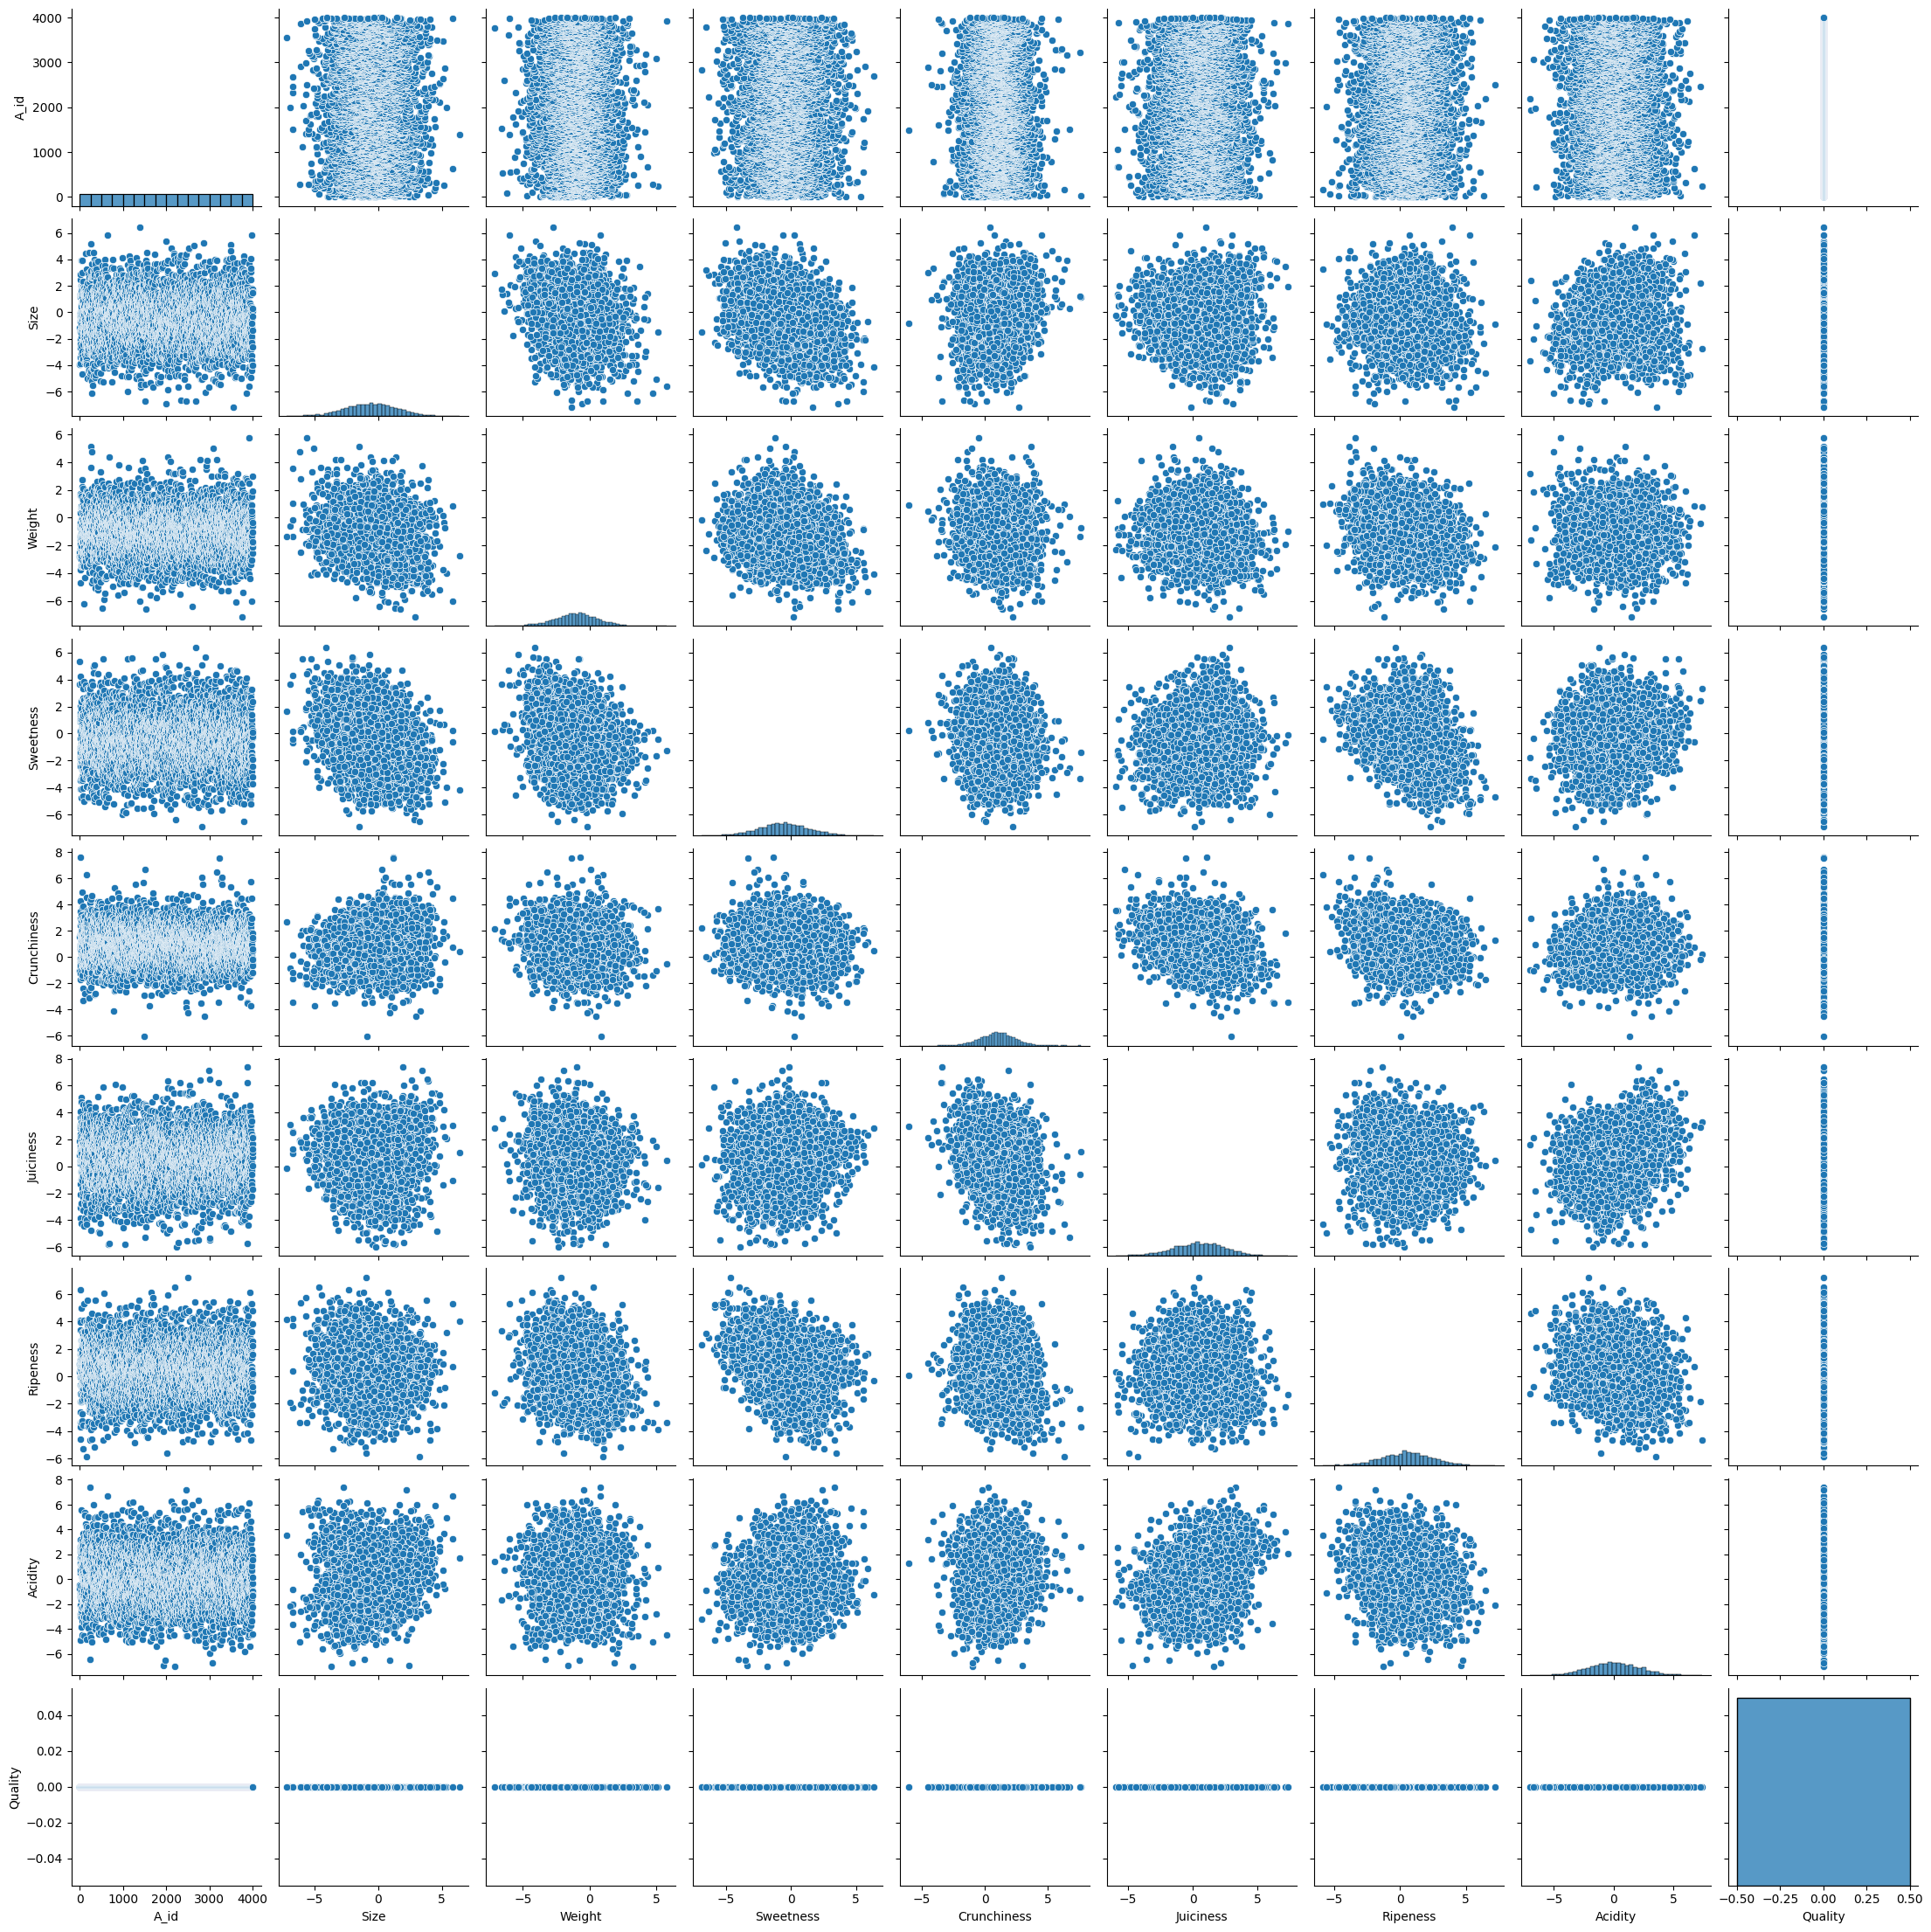

In [14]:
# Verificar distribuição e a correlação de varia[veis numa forma visual
sns.pairplot(df_frutas, diag_kind='hist')

In [17]:
# BoxPlot Quality x Weight
px.box(df_frutas, x='Quality', y='Weight', color='Quality')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Quality=%{x}<br>Weight=%{y}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#636efa'},
              'name': '0',
              'notched': False,
              'offsetgroup': '0',
              'orientation': 'v',
              'showlegend': True,
              'type': 'box',
              'x': array([0, 0, 0, ..., 0, 0, 0]),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([-2.51233638, -2.83925653, -1.35128199, ..., -2.13824672, -1.77933711,
                          -1.71550503]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'overlay',
               'legend': {'title': {'text': 'Quality'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y',
                         'categoryarray': [0],
                         'categoryorder': 'array',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'Quality'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Weight'}}}
})

In [18]:
# BoxPlot Quality x Sweetness
px.box(df_frutas, x='Quality', y='Sweetness', color='Quality')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Quality=%{x}<br>Sweetness=%{y}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#636efa'},
              'name': '0',
              'notched': False,
              'offsetgroup': '0',
              'orientation': 'v',
              'showlegend': True,
              'type': 'box',
              'x': array([0, 0, 0, ..., 0, 0, 0]),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([ 5.34632961,  3.66405876, -1.73842916, ..., -2.44046129,  2.36639697,
                           0.12121725]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'overlay',
               'legend': {'title': {'text': 'Quality'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y',
                         'categoryarray': [0],
                         'categoryorder': 'array',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'Quality'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Sweetness'}}}
})

In [19]:
# BoxPlot Quality x Size
px.box(df_frutas, x='Quality', y='Size', color='Quality')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Quality=%{x}<br>Size=%{y}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#636efa'},
              'name': '0',
              'notched': False,
              'offsetgroup': '0',
              'orientation': 'v',
              'showlegend': True,
              'type': 'box',
              'x': array([0, 0, 0, ..., 0, 0, 0]),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([-3.97004852, -1.19521719, -0.29202386, ..., -2.6345153 , -4.00800374,
                           0.27853965]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'overlay',
               'legend': {'title': {'text': 'Quality'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y',
                         'categoryarray': [0],
                         'categoryorder': 'array',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'Quality'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Size'}}}
})